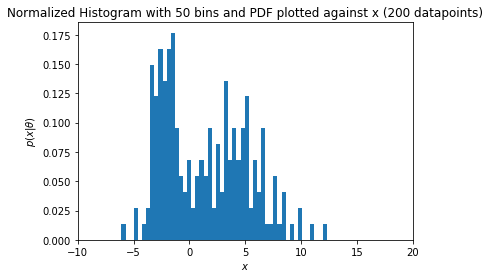

In [28]:
#Task 1.A

import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt
import math

# Define the distributions to be plotted

sigma_values_init = [1,np.sqrt(10)]

mu_init = [-2,4]

pi_init = [0.4, 0.6]

N=200


def generate_x(N, pi_1,sigma_sq_1,sigma_sq_2,mu_1,mu_2):
    
    N1=math.floor(N*pi_init[0])

    N2=N-N1
    
    generated_x=np.append(np.random.normal(mu_1 , sigma_sq_1, N1), np.random.normal(mu_2, sigma_sq_2, N2))
    
    return generated_x

generated_x=generate_x(N,pi_init[0],sigma_values_init[0],sigma_values_init[1],mu_init[0],mu_init[1])


plt.hist(generated_x, bins=50, density=True,orientation = u'vertical')

plt.title("Normalized Histogram with 50 bins and PDF plotted against x (200 datapoints)")

plt.xlabel('$x$')

plt.ylabel(r'$p(x|\theta)$')

plt.xlim(-10, 20)

plt.show()


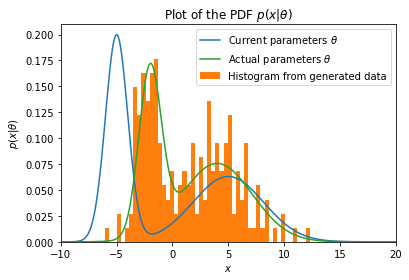

pi = 0.5
µ_1 = -5
µ_2 = 5
σ_1 =  1
σ_2 =  3.1622776601683795
Log-likehood: -711.5870684307441


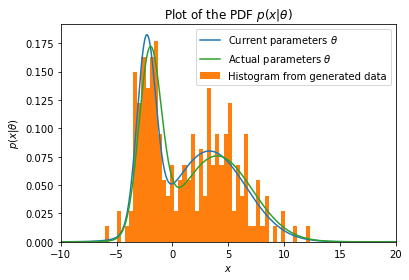

pi = 0.3452944448502789
µ_1 = -2.3255311278543562
µ_2 = 3.3254932975072515
σ_1 =  0.837708583067713
σ_2 =  3.263497606014951
Log-likehood: -517.3409674250809


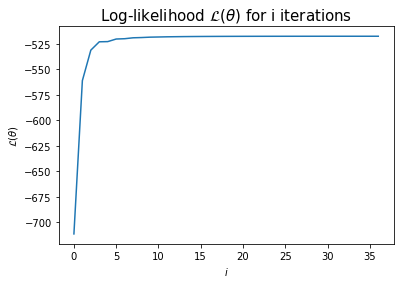

In [29]:
#Task 1.B

import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt


#Function to compute log likelihood from last exercise with minor changes 
def log_likelihood(x, pi, mu1, sigma1, mu2, sigma2): 

    sum_C=0

    sum_N=0

    N=len(x)

    dist1 = norm(mu1,sigma1)

    dist2 = norm(mu2,sigma2)

    for i in range(N):

        sum_C=pi*dist1.pdf(x[i]) + (1-pi)*dist2.pdf(x[i])

        sum_C_log=np.log(sum_C)

        sum_N+=sum_C_log

    return sum_N

#Function to plot and print log-likelihood with parameters from last exercise with minor changes 
def plot_and_log(generated_x, pi, mu1, sigma1, mu2, sigma2):

    dist1_init = norm(mu_init[0], sigma_values_init[0])

    dist2_init = norm(mu_init[1], sigma_values_init[1])

    pdft_init = pi_init[0]*dist1_init.pdf(x)+pi_init[1]*dist2_init.pdf(x)

    dist1 = norm(mu1,sigma1)

    dist2 = norm(mu2,sigma2)

    pdft= pi*dist1.pdf(x)+(1-pi)*dist2.pdf(x)

    plt.plot(x, pdft, label=r'Current parameters $\theta$')

    plt.hist(generated_x, bins=50, density=True, orientation = u'vertical', label='Histogram from generated data')

    plt.plot(x, pdft_init, label=r'Actual parameters $\theta$')

    plt.xlim(-10, 20)

    plt.xlabel('$x$')

    plt.ylabel(r'$p(x|\theta)$')

    plt.title(r'Plot of the PDF $p(x|{\theta})$')

    plt.legend()

    plt.show()

    print('pi =', pi)
    print('µ_1 =', mu1)
    print('µ_2 =', mu2)
    print('σ_1 = ', sigma1)
    print('σ_2 = ', sigma2)
    print('Log-likehood:', log_likelihood(generated_x,pi, mu1, sigma1, mu2, sigma2))

#Initialize parameters
x = np.linspace(-10, 20, 1000) #Globally set

N_task_b=200
classes_task_b=2
mu_task_b=[-5, 5]
sigma_values_task_b=[1, np.sqrt(10)]
pi_c_task_b=[0.5, 0.5]
convergence_condition_task_b=10**-3
plot_and_log(generated_x, pi_c_task_b[0], mu_task_b[0], sigma_values_task_b[0], mu_task_b[1], sigma_values_task_b[1]) #Plot with the intialized values


def EM (N, generated_x, classes, mean, standard_deviation, pi_c, convergence_condition):
    
    sigma_values = standard_deviation
    mu = mean
    i=0
    generated_x_vals=generated_x
    C=classes
    num=np.empty((C,N)) #Initialize numerator term array
    log_likelihood_vals=[log_likelihood(generated_x_vals, pi_c[0], mu[0], sigma_values[0], mu[1], sigma_values[1]), 0] #Initialize log-likelihood values


    #EM Algorithm implementation
    #E-step start
    while abs(log_likelihood_vals[i]-log_likelihood_vals[i+1]) > convergence_condition:

        for c in range(C):

                class_c = norm(mu[c],sigma_values[c])

                num[c][:]=class_c.pdf(generated_x_vals)*pi_c[c] #numerator term array computed


        den=np.zeros(N) #denominatior term initiazlized

        r = np.zeros((C, N)) #r[c] initialized

        for c in range (C):

            den+=num[c] #denominator term array computed

        for c in range (C): 

            r[c]=num[c]/den #r[c] computed

    #E-step end


    #M-step start
        for c in range(C):

            pi_c[c]=np.mean(r[c])

            mu[c]=np.dot(r[c],generated_x_vals)/np.sum(r[c])

            sigma_values[c]=np.sqrt(np.dot(r[c],((generated_x_vals-mu[c])**2))/np.sum(r[c]))

    #M-step end

            i+=1

            log_likelihood_vals.append(log_likelihood(generated_x_vals, pi_c[0], mu[0], sigma_values[0], mu[1], sigma_values[1]))

   

    #log-likelihood over number of iterations
    iterations=np.arange(i+1)

    del log_likelihood_vals[1]

    log_likelihood_vals=np.array(log_likelihood_vals)
    
    return iterations, log_likelihood_vals, pi_c, mu, sigma_values


#Function call with N, generated_x, classes and parameters set for Task B
iterations, log_likelihood_vals, pi_c, mu, sigma_values=EM(N_task_b, generated_x, classes_task_b, mu_task_b, sigma_values_task_b, pi_c_task_b, convergence_condition_task_b)

#Plotting using final paramters and the log-likehood against iterations graph
plot_and_log(generated_x, pi_c[0], mu[0], sigma_values[0], mu[1], sigma_values[1]) #Plot with the final paramters values

plt.plot(iterations, log_likelihood_vals)

plt.xlabel('$i$')

plt.ylabel(r'$\mathcal{L}(\theta)$')

plt.title(r'Log-likelihood $\mathcal{L}(\theta)$ for i iterations',fontsize=15)

plt.show()      



        



In [27]:
#Task 1.C

N_task_c=5
classes_task_c=2
mu_task_c=[-5, 5]
sigma_values_task_c=[1.0, np.sqrt(10)]
pi_c_task_c=[0.5, 0.5]
convergence_condition_task_c=10**-3
iterations_c=log_likelihood_vals_c= pi_c_c= mu_c= sigma_values_c=[[0],[0]] 
for i in range(2):
    generated_x_task_c=generate_x(N_task_c, pi_init[0],sigma_values_init[0],sigma_values_init[1],mu_init[0],mu_init[1])
    v1, v2, v3, v4, v5 = EM(N_task_c, generated_x_task_c, classes_task_c, mu_task_c, sigma_values_task_c, pi_c_task_c, convergence_condition_task_c)
    iterations_c.append(v1)
    log_likelihood_vals_c.append(v2)
    pi_c_c.append(v3)
    mu_c.append(v4)
    sigma_values_c.append(v5)

print('number of iterations:', v1[-1])
print('Log-likelihood values:', v2)
print('Pi values:', v3)
print('Mu values:', v4)
print('Sigma values:', v5)

number of iterations: 0
Log-likelihood values: [nan]
Pi values: [0.19999999999999996, 0.8]
Mu values: [-1.4621263173825239, 5.022505677419717]
Sigma values: [0.0, 3.3577813444944002]


/home/ale/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1652: RuntimeWarning: invalid value encountered in double_scalars
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/home/ale/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1652: RuntimeWarning: divide by zero encountered in double_scalars
  x = np.asarray((x - loc)/scale, dtype=dtyp)


In [25]:
#Task 1.D, part 1
N_task_d1=200
classes_task_d1=2
mu_task_d1=[10, 15]
sigma_values_task_d1=[np.sqrt(12), np.sqrt(14)]
pi_c_task_d1=[0.2, 0.8]
convergence_condition_task_d1=10**-3
iterations_d1=log_likelihood_vals_d1= pi_c_c= mu_c= sigma_values_c=[[0],[0]] 
for i in range(2):
    generated_x_task_d1=generate_x(N_task_d1, pi_init[0],sigma_values_init[0],sigma_values_init[1],mu_init[0],mu_init[1])
    v1, v2, v3, v4, v5 = EM(N_task_d1, generated_x_task_d1, classes_task_d1, mu_task_d1, sigma_values_task_d1, pi_c_task_d1, convergence_condition_task_d1)
    iterations_d1.append(v1)
    log_likelihood_vals_d1.append(v2)
    pi_c_c.append(v3)
    mu_c.append(v4)
    sigma_values_c.append(v5)

print('number of iterations:', v1[-1])
print('Log-likelihood values:', v2)
print('Pi values:', v3)
print('Mu values:', v4)
print('Sigma values:', v5)

number of iterations: 30
Log-likelihood values: [-512.85553609 -512.26557091 -510.71844836 -510.69834234 -510.57859067
 -510.56813673 -510.5199344  -510.50861355 -510.48384034 -510.47249992
 -510.45744933 -510.44722755 -510.43704863 -510.42839103 -510.42105132
 -510.41397086 -510.40848297 -510.40280801 -510.39862348 -510.39412971
 -510.39090674 -510.38737531 -510.38488112 -510.38211998 -510.3801862
 -510.37803502 -510.37653527 -510.37486376 -510.37370115 -510.37240505
 -510.37150455]
Pi values: [0.4349104394336633, 0.5650895605663367]
Mu values: [-1.768088789323331, 3.8747670163918033]
Sigma values: [1.0400675161138695, 3.0894199925500323]


In [23]:
#Task 1.D, part 2
N_task_d2=200
classes_task_d2=2
mu_task_d2=[40, 32]
sigma_values_task_d2=[np.sqrt(12), np.sqrt(14)]
pi_c_task_d2=[0.05, 0.95]
convergence_condition_task_d2=10**-6
iterations_d2=log_likelihood_vals_d2= pi_c_c= mu_c= sigma_values_c=[[0],[0]] 

generated_x_task_d2=generate_x(N_task_d2, pi_init[0],sigma_values_init[0],sigma_values_init[1],mu_init[0],mu_init[1])
v1, v2, v3, v4, v5 = EM(N_task_d2, generated_x_task_d2, classes_task_d2, mu_task_d2, sigma_values_task_d2, pi_c_task_d2, convergence_condition_task_d2)
iterations_d2.append(v1)
log_likelihood_vals_d2.append(v2)
pi_c_c.append(v3)
mu_c.append(v4)
sigma_values_c.append(v5)



print('number of iterations:', v1[-1])
print('Log-likelihood values:', v2)
print('Pi values:', v3)
print('Mu values:', v4)
print('Sigma values:', v5)

number of iterations: 4
Log-likelihood values: [-7071.11648017 -7057.08448721  -557.73765078  -557.73765078
  -557.73765078]
Pi values: [7.1302613708915065e-12, 0.9999999999928698]
Mu values: [10.12222700371594, 1.8277647737524982]
Sigma values: [1.7218921145740949, 3.9343658818442573]


Range of class 1: [-4.506329025334397] [-0.8591453886568998] Elements: 78
Range of class 2: [-0.8181174678804677] [11.097355184244854] Elements: 122


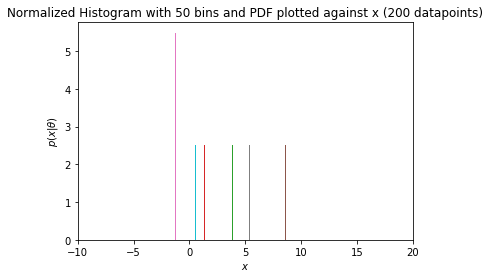

In [51]:
#Task 1.E

#Initial parameters and data generation
sigma_values_init = [1,np.sqrt(10)]
mu_init = [-2,4]
pi_init = [0.4, 0.6]
N=200
generated_x=generate_x(N,pi_init[0],sigma_values_init[0],sigma_values_init[1],mu_init[0],mu_init[1])

#Parameters calculated in task B

mu_c = [-2.3, 3.3]
sigma_c = [0.84 , 3.26]
pi_c = [0.35, 0.65]

#Classification

#For the more general case of C classes, we chose to maximize the probability of being correct,
#which is maximized when the regions are chosen such that each x is assigned to the class for which 
# he joint probability is p(x, C) is largest, this means that each term should be assigned to the class 
#having the largest posterior probability p(C|x)

#In the case of our generated data, the optimal decision boundary is around -0.85

num1 = np.zeros((2,N))
class_1 = ([0.0])
class_2 = ([0.0])
den = 0

for i in range(N):
    for c in range(2):
    
        class_c = norm(mu_c[c],sigma_c[c])
        num1[c][i]=class_c.pdf(generated_x[i])*pi_c[c] 
    
    pcx1= num1[0][i] / num1[0][i] + num1[1][i]
    pcx2= num1[1][i] / num1[0][i] + num1[1][i]
    
    if pcx1 > pcx2:
        class_1.append([generated_x[i]])
    else:
        class_2.append([generated_x[i]])
    i+=1
    
del class_1[0]
del class_2[0]
    
    

    
print('Range of class 1:', min(class_1), max(class_1), 'Elements:', len(class_1))
print('Range of class 2:', min(class_2), max(class_2), 'Elements:', len(class_2))

plt.hist(generated_x, bins=50, density=True,orientation = u'vertical')
plt.hist(class_1, bins=50, density=True,orientation = u'vertical')
plt.hist(class_2, bins=50, density=True,orientation = u'vertical')



plt.title("Normalized Histogram with 50 bins and PDF plotted against x (200 datapoints)")

plt.xlabel('$x$')

plt.ylabel(r'$p(x|\theta)$')

plt.xlim(-10, 20)

plt.show()

    

